# Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)

### Exponential Smoothing methods
#####  Exponential smoothing methods consist of flattening time series data. 
##### Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.
##### Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).
##### One or more parameters control how fast the weights decay.
##### These parameters have values between 0 and 1


In [1]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

## Read the data.

In [2]:
df = pd.read_csv('4AirPassenger.csv',parse_dates=True,index_col='Year-Month')
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
rcParams['figure.figsize'] = 15,8

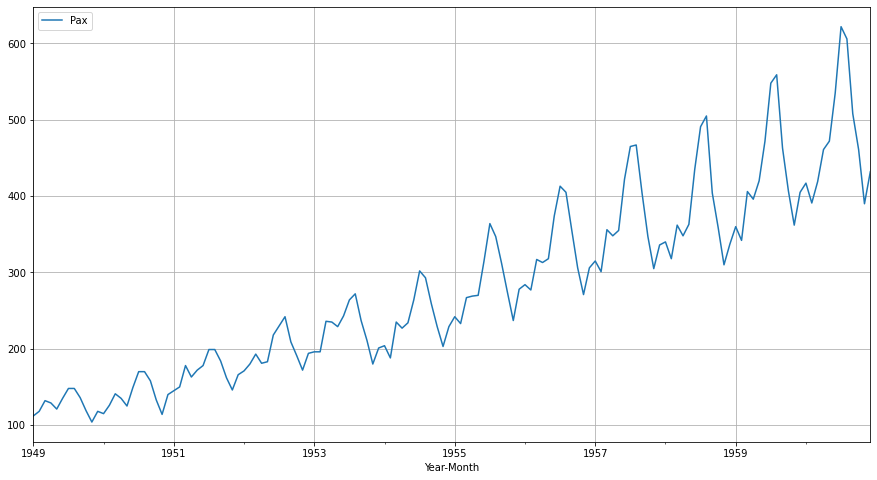

In [4]:
df.plot(grid=True);

## Split the data into training and test. The data from 1957 should be training data.

In [5]:
train             = df[df.index<'1957'] 
test              = df[df.index>'1957']

In [6]:
# Printing the AirPassengers Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-08-01,405
1956-09-01,355
1956-10-01,306


Test Data


,Pax
Year-Month,
1957-02-01,301
1957-03-01,356
1957-04-01,348
1957-05-01,355
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404
1957-10-01,347


### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [7]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [8]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [9]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 111.99999986482403,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be almost 1.

In [10]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1957-01-01    305.999999
1957-02-01    305.999999
1957-03-01    305.999999
1957-04-01    305.999999
1957-05-01    305.999999
1957-06-01    305.999999
1957-07-01    305.999999
1957-08-01    305.999999
1957-09-01    305.999999
1957-10-01    305.999999
1957-11-01    305.999999
1957-12-01    305.999999
1958-01-01    305.999999
1958-02-01    305.999999
1958-03-01    305.999999
1958-04-01    305.999999
1958-05-01    305.999999
1958-06-01    305.999999
1958-07-01    305.999999
1958-08-01    305.999999
1958-09-01    305.999999
1958-10-01    305.999999
1958-11-01    305.999999
1958-12-01    305.999999
1959-01-01    305.999999
1959-02-01    305.999999
1959-03-01    305.999999
1959-04-01    305.999999
1959-05-01    305.999999
1959-06-01    305.999999
1959-07-01    305.999999
1959-08-01    305.999999
1959-09-01    305.999999
1959-10-01    305.999999
1959-11-01    305.999999
1959-12-01    305.999999
1960-01-01    305.999999
1960-02-01    305.999999
1960-03-01    305.999999
1960-04-01    305.999999


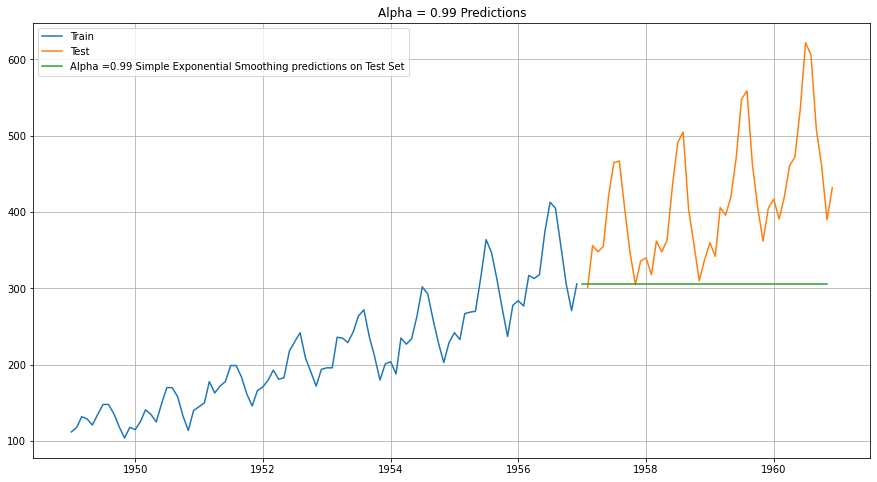

In [11]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [12]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [13]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 134.0068278168285
SES RMSE (calculated using statsmodels): 134.0068278168285


In [14]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006828


## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [18]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.9970272089906921, 'smoothing_trend': 7.924407350249068e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 107.47355347351028, 'initial_trend': 2.118701565853163, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [19]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1957-01-01    308.020877
1957-02-01    310.139183
1957-03-01    312.257489
1957-04-01    314.375795
1957-05-01    316.494101
1957-06-01    318.612407
1957-07-01    320.730712
1957-08-01    322.849018
1957-09-01    324.967324
1957-10-01    327.085630
1957-11-01    329.203936
1957-12-01    331.322242
1958-01-01    333.440548
1958-02-01    335.558854
1958-03-01    337.677160
1958-04-01    339.795465
1958-05-01    341.913771
1958-06-01    344.032077
1958-07-01    346.150383
1958-08-01    348.268689
1958-09-01    350.386995
1958-10-01    352.505301
1958-11-01    354.623607
1958-12-01    356.741913
1959-01-01    358.860218
1959-02-01    360.978524
1959-03-01    363.096830
1959-04-01    365.215136
1959-05-01    367.333442
1959-06-01    369.451748
1959-07-01    371.570054
1959-08-01    373.688360
1959-09-01    375.806665
1959-10-01    377.924971
1959-11-01    380.043277
1959-12-01    382.161583
1960-01-01    384.279889
1960-02-01    386.398195
1960-03-01    388.516501
1960-04-01    390.634807


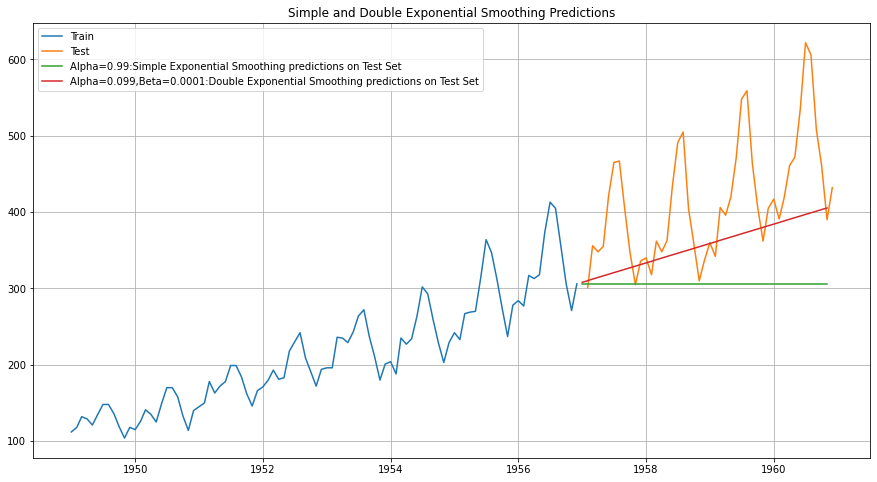

In [20]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [21]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 88.64292706896482


In [22]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006828
"Alpha=1,Beta=0.0189:DES",88.642927


### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [23]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.2546484323102029, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.745351567689797, 'damping_trend': nan, 'initial_level': 118.77014542608293, 'initial_trend': 2.332830807363198, 'initial_seasons': array([ -9.10301899,  -3.50542398,   8.96819355,   3.69523197,
        -5.06991109,   9.02915257,  21.24202252,  18.81639641,
         4.68660862, -14.11671356, -28.55654774, -11.94950707]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [24]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1957-01-01    319.235250
1957-02-01    311.528363
1957-03-01    350.278666
1957-04-01    346.984953
1957-05-01    351.844997
1957-06-01    403.925669
1957-07-01    440.566746
1957-08-01    427.446408
1957-09-01    376.628091
1957-10-01    329.767424
1957-11-01    296.561195
1957-12-01    341.114658
1958-01-01    347.229220
1958-02-01    339.522333
1958-03-01    378.272636
1958-04-01    374.978923
1958-05-01    379.838967
1958-06-01    431.919639
1958-07-01    468.560716
1958-08-01    455.440378
1958-09-01    404.622061
1958-10-01    357.761393
1958-11-01    324.555165
1958-12-01    369.108628
1959-01-01    375.223190
1959-02-01    367.516302
1959-03-01    406.266606
1959-04-01    402.972892
1959-05-01    407.832936
1959-06-01    459.913608
1959-07-01    496.554686
1959-08-01    483.434348
1959-09-01    432.616031
1959-10-01    385.755363
1959-11-01    352.549135
1959-12-01    397.102598
1960-01-01    403.217160
1960-02-01    395.510272
1960-03-01    434.260575
1960-04-01    430.966862


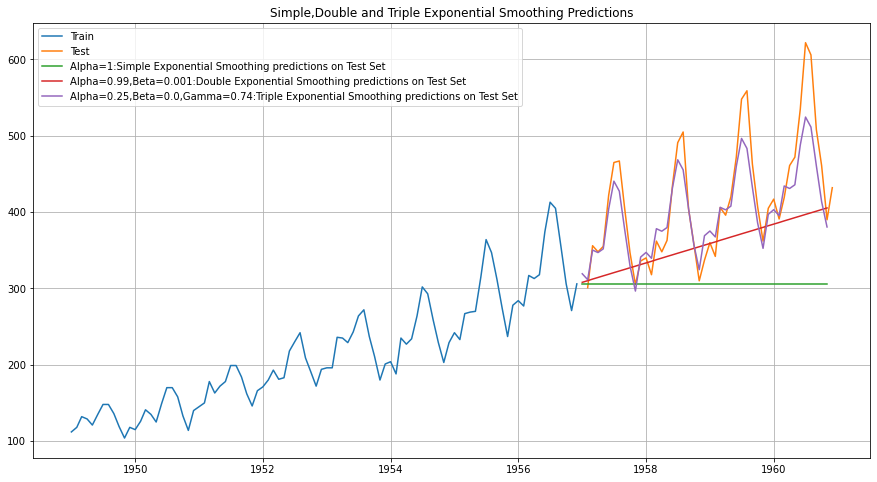

In [25]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [26]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 45.46918200032015


In [27]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006828
"Alpha=1,Beta=0.0189:DES",88.642927
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",45.469182


### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

ETS(A, A, M) model

In [28]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.7412463405103968, 'smoothing_trend': 4.430452025809208e-10, 'smoothing_seasonal': 8.42133302111631e-11, 'damping_trend': nan, 'initial_level': 105.64232569419318, 'initial_trend': 1.9388950497509425, 'initial_seasons': array([1.05197639, 1.02937179, 1.17993062, 1.14019392, 1.13270983,
       1.27785435, 1.41229951, 1.38213915, 1.21480938, 1.05535425,
       0.91730622, 1.03710228]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [29]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1957-01-01    312.900533
1957-02-01    308.172851
1957-03-01    355.534843
1957-04-01    345.772161
1957-05-01    345.698761
1957-06-01    392.473944
1957-07-01    436.505077
1957-08-01    429.863114
1957-09-01    380.176787
1957-10-01    332.321235
1957-11-01    290.629755
1957-12-01    330.595524
1958-01-01    337.376594
1958-02-01    332.122977
1958-03-01    382.987983
1958-04-01    372.300757
1958-05-01    372.053227
1958-06-01    422.205450
1958-07-01    469.364684
1958-08-01    462.020987
1958-09-01    408.441442
1958-10-01    356.875888
1958-11-01    311.972481
1958-12-01    354.725514
1959-01-01    361.852656
1959-02-01    356.073104
1959-03-01    410.441123
1959-04-01    398.829354
1959-05-01    398.407693
1959-06-01    451.936956
1959-07-01    502.224290
1959-08-01    494.178860
1959-09-01    436.706096
1959-10-01    381.430542
1959-11-01    333.315207
1959-12-01    378.855503
1960-01-01    386.328718
1960-02-01    380.023230
1960-03-01    437.894262
1960-04-01    425.357950


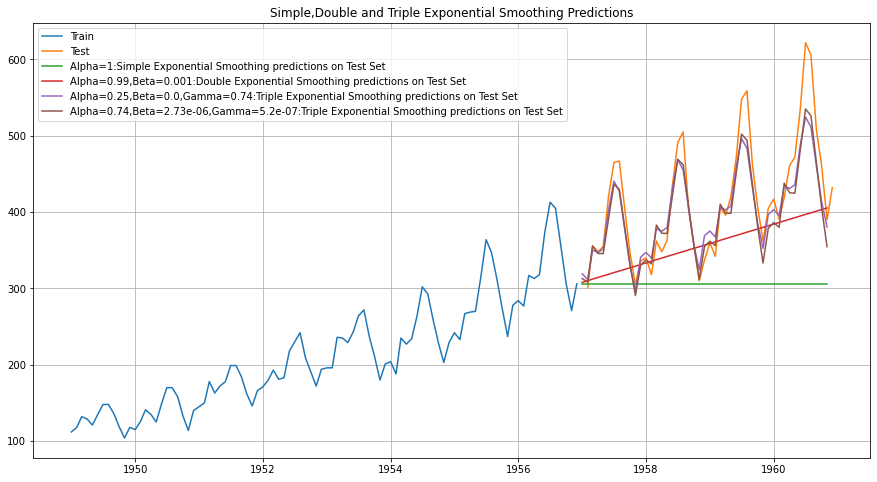

In [30]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [58]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 50.203638255153905


In [60]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",134.006828
"Alpha=1,Beta=0.0189:DES",89.745722
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",45.469076
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",50.203638


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.

# END